# 	 The Chars74K dataset

# OCR

## Department of Electrical and Computer Engineering, University of Thessaly, Volos, Greece

## Project: IoT OCR Part5
---

In this project, we implement a solution about is the [Chars74k](http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/). Character recognition is a classic pattern recognition problem.The recognition is for latin letters and digits.
> **Note**: 62 classes (0-9, A-Z, a-z)



---

## Introduction 
<img src="download.png"> 


- **STEP 1** is a pre-processing step where we prepareoy data to be fed in the NN.

- **STEP 2** is the Encoder step that takes the picture and converts it into D-dimensional tensor with L-Features with a CNN.This also cold feature extraction step because it detects patterns to help the detection process.
- **STEP 3** is the decoder which accepts the Encoder output as input and returns a probability distribution over all the classes with a  DNN(deep neural network) .

## The Data
The Chars74k dataset consists of:

- Image size: 64x64 or 128X128
- 7705 characters obtained from natural images
- 3410 hand drawn characters using a tablet PC
- 62992 synthesised characters from computer font


## Requirements
- python3
- Tansorflow 1.12 gpu
- opencv
- At least 16GB RAM
- At least 3GB GPU RAM







## Example!
<img src="unnamed.png"> 

In [3]:
proj_directory = '/Users/Theologis/Desktop/CAS Lab/sem-supervised_chars74k/' ##TOCHANGE...
%cd $proj_directory

C:\Users\Theologis\Desktop\CAS Lab\sem-supervised_chars74k


## STEP 1 
  At this step we load every image. We also  randomly shuffle data to train,validate and test sets and then plot a radom image for visualisation  purposes .The output of the NN should be a one hot encoded vector.This vector must have 1 in the right class and 0 the other 62 classes.
### Improving performance
The dataset is quite small (less than 10K images). Data augmentation along with a  [GAN](https://www.tensorflow.org/tutorials/generative/dcgan) model help as increase our model's accuracy from 70%  to $88 $% .The GAN model also add the 63th class witch gives as the probability that the image is latter in the 62 classes. 
#### Data augmentation Steps
- Random rotations between -10 and 10 degrees.
- Random translation between -10 and 10 pixels in any direction.
- Random zoom between factors of 1 and 1.3.
- Gray scale.

In [2]:
from data_gen import load_data
train_x, train_y,val_x, val_y,test_x, test_y,input_shape = load_data(proj_directory)



100%|███████████████████████████████████████████████████████████████████████████████████| 62/62 [00:14<00:00,  4.24i/s]


Data successfully loades with shape :  (20, 20, 1)


One hot Vector is: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


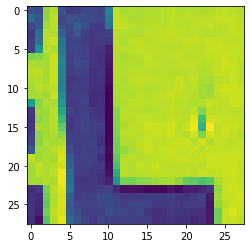

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_x[2])
print("One hot Vector is:",train_y[1])

# Last steps (Our model)
In semi-supervised learning, our goal is still to train a model that takes $x$ as input and generates $y$ as output. However, not all of our training examples have a label $y$. We need to develop an algorithm that is able to get better at classification by studying both labeled $(x, y)$ pairs and unlabeled $x$ examples.

To do this for the Chars74K dataset, we'll turn the GAN discriminator into an 62 class discriminator. It will recognize the 10 different classes of real Chars74K, as well as an 63th class of fake images that come from the generator. The discriminator will get to train on real labeled images, real unlabeled images, and fake images. By drawing on three sources of data instead of just one, it will generalize to the test set much better than a traditional classifier trained on only one source of data.The idea of this model was form this [paper](https://arxiv.org/pdf/1606.03498.pdf).

In [2]:
from train_utils import GAN

real_size = (32,32,1)
learning_rate = 0.001

net = GAN(real_size, learning_rate)


C:\Users\Theologis\anaconda3\envs\tf-dnndk\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Theologis\anaconda3\envs\tf-dnndk\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Theologis\anaconda3\envs\tf-dnndk\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Theologis\anaconda3\envs\tf-dnndk\lib\site-

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_68 (Conv2D)           (None, 15, 15, 64)        640       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
batch_normalization_36 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_37 (Batc (None, 3, 3, 64)          256       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
batch_normalization_38 (Batc (None, 1, 1, 128)         512       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 1, 1, 128)         147584    
_________________________________________________________________
batch_normalization_39 (Batc (None, 1, 1, 128)         512       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 62)                7998      
=================================================================
Total params: 453,054
Trainable params: 452,286
Non-trainable params: 768
_________________________________________________________________

# Train  model

In [3]:
from data_gen import Feature_Extraction
from train_utils import train
batch_size = 128
epochs = 15
##Data instantiation 
dataset = Feature_Extraction(minibatch_size=batch_size,proj_directory= proj_directory,real_size=real_size )
###Train the model
train_accuracies, valid_accuracies = train(net, dataset, epochs, batch_size, figsize=(10,5))

100%|███████████████████████████████████████████████████████████████████████████████████| 62/62 [00:37<00:00,  1.67i/s]


62992 data successfully loades with shape :  (32, 32, 1)
Saving Test Data
Epoch 0
		Classifier train accuracy:  0.698433524173028
		Classifier validation accuracy 0.7833227040816326
		Step time:  0.03152632713317871
		Epoch time:  15.537950038909912
Epoch 1
		Classifier train accuracy:  0.816690853428225
		Classifier validation accuracy 0.8158482142857143
		Step time:  0.03152728080749512
		Epoch time:  12.98215937614441
Epoch 2
		Classifier train accuracy:  0.8416197841083036
		Classifier validation accuracy 0.8391262755102041
		Step time:  0.032027482986450195
		Epoch time:  12.962141752243042
Epoch 3
		Classifier train accuracy:  0.8609625668449198
		Classifier validation accuracy 0.8466198979591837
		Step time:  0.03302812576293945
		Epoch time:  13.037707328796387
Epoch 4
		Classifier train accuracy:  0.8748185992883128
		Classifier validation accuracy 0.8670280612244898
		Step time:  0.032027244567871094
		Epoch time:  13.000174283981323
Epoch 5
		Classifier train accuracy:  0.88

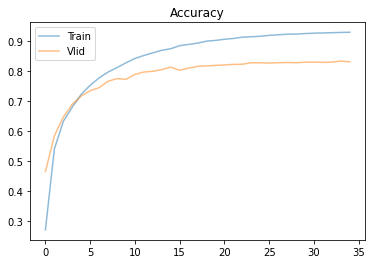

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(train_accuracies, label='Train', alpha=0.5)
plt.plot(valid_accuracies, label='Vlid', alpha=0.5)
plt.title("Accuracy")
plt.legend()

# Run Prediction

In [5]:
from Prediction import Run_pred
real_size = (32,32,1)
Run_pred(proj_directory,"/Users/Theologis/Desktop/CAS Lab/sem-supervised_chars74k/images/tempE2.png",real_size=real_size)

INFO:tensorflow:Restoring parameters from ./savedmodel\variables\variables
Output node/s name : discriminator/out:0
Prediction of the first image is : E


In this step we load the .pb that created in the training and run the prediction for a given image.The Output node/s name is the input in the next step without the ":0".In the next step we must specify the output node of the NN. In the next step we are going to create the appropriate files for the DNNDK(frozen_model_dnndk.pd).We also  are going to print  all the notes of the model."Input_real" is the input node and "discriminator/out" is the output node.

# Create DNNDK inputs

In [4]:
from Create_DNNDK_files import Create_Frozen_graph
Create_Frozen_graph(output_node_names="discriminator/out")

INFO:tensorflow:Restoring parameters from ./savedmodel\variables\variables
INFO:tensorflow:Restoring parameters from ./checkpoint\checkpoint.ckpt
INFO:tensorflow:Froze 20 variables.
INFO:tensorflow:Converted 20 variables to const ops.
DNNDK graph successfully created
The nodes name are:
prefix/input_real
prefix/discriminator/dropout/Identity
prefix/discriminator/conv2d/kernel
prefix/discriminator/conv2d/kernel/read
prefix/discriminator/conv2d/bias
prefix/discriminator/conv2d/bias/read
prefix/discriminator/conv2d/Conv2D
prefix/discriminator/conv2d/BiasAdd
prefix/discriminator/mul/x
prefix/discriminator/mul
prefix/discriminator/Maximum
prefix/discriminator/dropout_1/Identity
prefix/discriminator/conv2d_1/kernel
prefix/discriminator/conv2d_1/kernel/read
prefix/discriminator/conv2d_1/bias
prefix/discriminator/conv2d_1/bias/read
prefix/discriminator/conv2d_1/Conv2D
prefix/discriminator/conv2d_1/BiasAdd
prefix/discriminator/mul_1/x
prefix/discriminator/mul_1
prefix/discriminator/Maximum_1
pr

## Run DECENT_Q
A script file named **“decen_q.sh”** can be found in ${dnndk_chars74k}/,
shown as below. Run “sh decent_q.sh” to invoke the DECENT_Q tool to perform quantization with the
appropriate parameters.


In [ ]:
decent_q quantize \
  --input_graph_def frozen_model_dnndk.pb \
  --input_nodes  input_real\
  --input_shapes ?,32,32,1 \
  --output_nodes discriminator/out \
  --input_fn data_den.load_data\
  --method 1 \
  --gpu 0 \
  --calib_iter 10 \
  --output_dir ./quantize_results \ 